Author: Grażyna Rozmysłowicz

# Boston Housing
Data: `BostonHousing.csv`

Source: https://www.kaggle.com/c/boston-housing

Fun facts: https://towardsdatascience.com/things-you-didnt-know-about-the-boston-housing-dataset-2e87a6f960e8

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:
- **crim** - per capita crime rate by town.
- **zn** - proportion of residential land zoned for lots over 25,000 sq.ft.
- **indus** - proportion of non-retail business acres per town.
- **chas** - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- **nox** - nitrogen oxides concentration (parts per 10 million).
- **rm** - average number of rooms per dwelling.
- **age** - proportion of owner-occupied units built prior to 1940.
- **dis** - weighted mean of distances to five Boston employment centres.
- **rad** - index of accessibility to radial highways.
- **tax** - full-value property-tax rate per \$ 10,000.
- **ptratio** - pupil-teacher ratio by town.
- **black** - 1000(Bk - 0.63)^2, where Bk is the proportion of blacks by town.
- **lstat** - lower status of the population (percent).
- **medv** - median value of owner-occupied homes in $1000s.

## Project structure

[1. Importing libraries](#1.-Importing-libraries) <br>
[2. Uploading data](#2.-Uploading-data)<br>
[3. Missing values](#3.-Missing-values)<br>
[4. Censored data](#4.-Censored-data)<br>
[5. Assignments - Processing](#5.-Assignments-_-Processing)<br>

- Assignment 1 - data division
- Assignment 2 - standardization 
- Assignment 3 - correlation matrix

[6. Assignments - Modelling](#6.-Assignments-_-Modelling)<br>

- Assignment 1 - linear regression
- Assignment 2 - neural network
- Assignment 3 - comparison

[7. Assignments - Visualization ](#7.-Assignments-_-Visualization )<br>

- Assignment 1 - scatter plot
- Assignment 2 - Dashboard

### 1. Importing libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn import metrics
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import MeanSquaredError

import dash
from dash import dcc
from dash import html
import plotly.graph_objs as go
from jupyter_dash import JupyterDash
from dash.dependencies import Input, Output

### 2. Uploading data

In [55]:
df_start = pd.read_csv('datasets/BostonHousing.csv', sep=',', decimal='.')
df_start.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [56]:
df_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [57]:
df_start.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 3. Missing values

<AxesSubplot:>

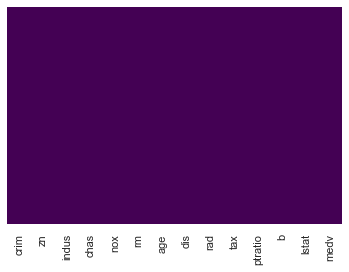

In [58]:
sns.heatmap(df_start.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [59]:
df_start.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

There is no missing data.

### 4. Censored data

Text(0, 0.5, 'Value of house / 1000 USD (medv)')

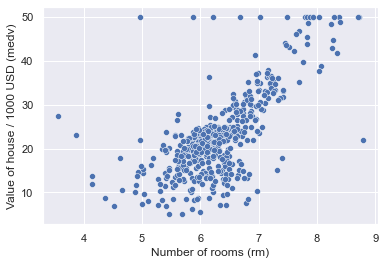

In [60]:
sns.set_theme()
sns.scatterplot(data=df_start, x='rm',y='medv')
plt.xlabel('Number of rooms (rm)')
plt.ylabel('Value of house / 1000 USD (medv)')

Notice that prices of homes seem to be capped at 50. This is because the Census Service censored the data. Censoring data means restricting the range of possible values of a variable. In this case, they decided to set the maximum value of the price variable to 50k USD, so no price can go beyond that value. In reality, these prices were probably higher.

### 5. Assignments _ Processing

<u>**Assignment 2**</u> Remove the `Chas` column. Standardize all columns except `Medv`.


In [61]:
df2 = df_start.drop('chas', axis=1)

We create a StandardScaler() object called scaler, fit it to the features.

In [62]:
scaler = StandardScaler()
scaler.fit(df2.drop('medv', axis=1))

StandardScaler()

We use the .transform() method to transform the features to a scaled version.

In [63]:
scaled_features = scaler.transform(df2.drop('medv', axis=1))

We convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.

In [64]:
df = pd.DataFrame(scaled_features,columns=df2.columns[:-1])
df['medv'] = df_start['medv']
df.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,-0.419782,0.284830,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


Below there is our data frame before standardization.

In [65]:
df2.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


It looks like standardization works :)

Second method to standardise data is the following:

In [66]:
#df2 = (df2 - df2.mean())/df2.std() #standaryzacja danych

Third method:

In [67]:
# from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler()

<u> **Assignment 1**</u>
Divide the data into the training set and the test in the ratio 0.75 / 0.25.


In [68]:
X = df.drop('medv', axis=1)
y = df['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
X_train.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat
388,1.247542,-0.487722,1.015999,1.255192,-2.001125,1.117494,-1.048447,1.661245,1.530926,0.806576,0.178127,2.518494
156,-0.135789,-0.487722,1.231945,2.732346,-1.442658,0.904131,-0.978615,-0.523001,-0.031105,-1.736418,-2.938931,0.488777
53,-0.414721,0.413589,-0.802031,-0.999412,-0.408356,-1.677566,1.435452,-0.637962,-0.981390,-0.765457,0.441052,-0.591963
311,-0.328535,-0.487722,-0.180458,-0.092387,-0.231698,-0.560965,-0.548929,-0.637962,-0.619094,-0.025677,0.441052,-0.935389
189,-0.410777,1.443658,-1.123032,-1.016689,1.282714,-1.055256,0.366822,-0.523001,-0.060801,-1.505237,0.441052,-1.018091


In [69]:
y_train.head()

388    10.2
156    13.1
53     23.4
311    22.1
189    34.9
Name: medv, dtype: float64

<u>**Assignment 3**</u>
Show the correlation matrix for all data columns in the form of a heatmap and data frame.

In [70]:
corrMatrix = df.corr()
corrMatrix

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
nox,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
ptratio,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787


In [71]:
len(df.keys())

13

Text(0.5, 1.0, 'Correlation heatmap')

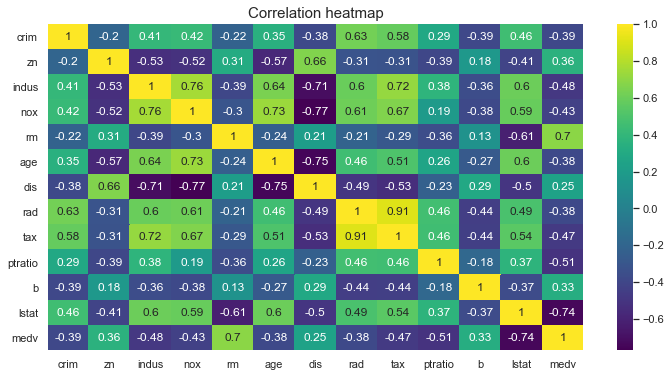

In [72]:
sns.set_theme()
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='viridis',annot=True)
plt.title('Correlation heatmap', fontdict={'fontsize':15})

### 6. Assignments _ Modelling
Objective variable: `MEDV`

<u>**Assignment 1**</u>
Perform a regression using a linear model. Indicate the variables for which the value of the linear parameter was the highest.

In [73]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', mean_squared_error(y_test, y_pred)**0.5)
print('R^2: ', lr.score(X_test, y_test))

MSE:  29.8319114934354
RMSE:  5.461859710156917
R^2:  0.7148742369596652


**`intercept_`** = Independent term in the linear model

In [74]:
print(lr.intercept_) 

22.408361449086048


**`coef_`** = Estimated coefficients for the linear regression problem. If multiple targets are passed during the fit (y 2D), this is a 2D array of shape (n_targets, n_features), while if only one target is passed, this is a 1D array of length n_features.

In [75]:
print(lr.coef_)

[-0.85566634  1.11707255  0.2485377  -1.99576766  2.52143842  0.1638579
 -3.1750488   2.49792357 -1.89009613 -2.12349321  0.72942183 -4.17959595]


DataFrame with coefficients (współczynniki regresji liniowej)

In [76]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
crim,-0.855666
zn,1.117073
indus,0.248538
nox,-1.995768
rm,2.521438
age,0.163858
dis,-3.175049
rad,2.497924
tax,-1.890096
ptratio,-2.123493


Top 3 variables for which the value of the linear parameter was the highest.

In [77]:
coeff_df.nlargest(3,'Coefficient')

,Coefficient
rm,2.521438
rad,2.497924
zn,1.117073


<u>**Assignment 2**</u>
Perform a regression using a 3-layer neural network (three neurons in each layer).

In [78]:
model = keras.Sequential([
    Dense(3, input_shape = (12,), activation = 'relu'),
    Dense(3, activation = 'relu'),
    Dense(3, activation = 'relu'),
    Dense(1)
])

model.compile(optimizer = 'adam', loss = MeanSquaredError(), metrics = ['mse'])
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, verbose = 1)

Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 570.3780 - mse: 570.3780 - val_loss: 667.7598 - val_mse: 667.7598
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 568.9211 - mse: 568.9211 - val_loss: 666.5579 - val_mse: 666.5579
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 567.7370 - mse: 567.7370 - val_loss: 665.5157 - val_mse: 665.5157
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 566.7384 - mse: 566.7384 - val_loss: 664.5738 - val_mse: 664.5738
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 565.8582 - mse: 565.8582 - val_loss: 663.7078 - val_mse: 663.7078
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 565.0433 - mse: 565.0433 - val_loss: 662.8901 - val_mse: 662.8901
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 564.2665 - mse: 564.2665 - val_loss: 662.0837 - val_mse: 662.0837
Epoch 8/100
12/12 [=======

12/12 [==============================] - 0s 6ms/step - loss: 99.9003 - mse: 99.9003 - val_loss: 126.2658 - val_mse: 126.2658
Epoch 60/100
12/12 [==============================] - 0s 6ms/step - loss: 95.7244 - mse: 95.7244 - val_loss: 121.5937 - val_mse: 121.5937
Epoch 61/100
12/12 [==============================] - 0s 6ms/step - loss: 92.4468 - mse: 92.4468 - val_loss: 116.9978 - val_mse: 116.9978
Epoch 62/100
12/12 [==============================] - 0s 6ms/step - loss: 89.1231 - mse: 89.1231 - val_loss: 113.2445 - val_mse: 113.2445
Epoch 63/100
12/12 [==============================] - 0s 6ms/step - loss: 86.4392 - mse: 86.4392 - val_loss: 109.7018 - val_mse: 109.7018
Epoch 64/100
12/12 [==============================] - 0s 6ms/step - loss: 83.8623 - mse: 83.8623 - val_loss: 106.4748 - val_mse: 106.4748
Epoch 65/100
12/12 [==============================] - 0s 6ms/step - loss: 81.5307 - mse: 81.5307 - val_loss: 103.4421 - val_mse: 103.4421
Epoch 66/100
12/12 [===========================

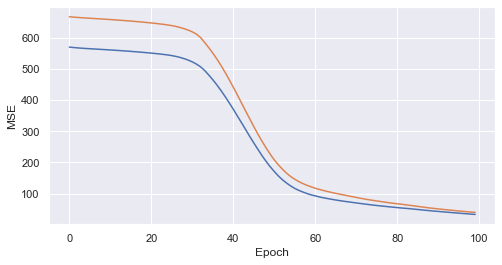

In [79]:
plt.figure(figsize=(8,4))

plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(model.history.history['loss'][:])
plt.plot(model.history.history['val_loss'][:])

<u>**Assignment 3**</u>
Compare both models using the `R squared` factor.

In [81]:
y_pred_lr = lr.predict(X_test)

print('For linear regression model:')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))
print('R^2:', lr.score(X_test, y_test))
print('R^2:', metrics.r2_score(y_test, y_pred_lr))

For linear regression model:
MAE: 3.8577212116246646
MSE: 29.8319114934354
RMSE: 5.461859710156917
R^2: 0.7148742369596652
R^2: 0.7148742369596652


In [82]:
y_pred_tf = model.predict(X_test)
y_pred_tf = np.ravel(y_pred_tf)
print('Dla modelu regresji z użyciem sieci neuronowej:')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_tf))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_tf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_tf)))
print('R^2:', metrics.r2_score(y_test, y_pred_tf))

Dla modelu regresji z użyciem sieci neuronowej:
MAE: 4.633591614370271
MSE: 39.54301314869261
RMSE: 6.288323556298023
R^2: 0.6220580166505251


**R^2 comparison**

In [83]:
print('R^2 dla modelu regresji liniowej: ', metrics.r2_score(y_test, y_pred_lr))
print('R^2 dla modelu sieci neuronowej: ', metrics.r2_score(y_test, y_pred_tf))

R^2 dla modelu regresji liniowej:  0.7148742369596652
R^2 dla modelu sieci neuronowej:  0.6220580166505251


### 7. Assignments _ Visualization 
<u>**Assignment 1**</u>
Create a scatter plot that represents the relationship between the `medv` and `crim` columns. Superimpose a trend line on this chart.

<AxesSubplot:xlabel='medv', ylabel='crim'>

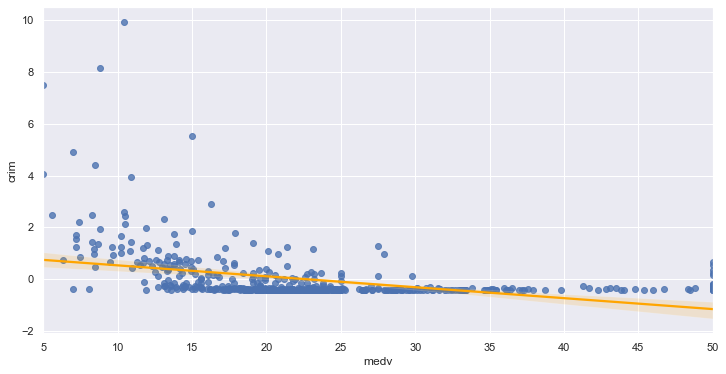

In [84]:
plt.figure(figsize=(12,6))
sns.regplot(x='medv', y='crim', data=df, line_kws={"color": "orange"})

<u>**Assignment 2**</u>
Create a `Dashboard` that will include: <br>
&emsp; a)	Bar chart for parameters from the linear model. <br>
&emsp; b)	Histogram for the selected column of data. <br>
&emsp; c)	Scatterplot for any pair of columns. <br>

In [85]:
pip install jupyter-dash

In [86]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

fig = px.bar(data_frame=coeff_df, log_y=True)

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div([
    html.H1('Dashboard in project'),
    html.Div('a) Bar chart for parameters from the linear model', style = {'color':'black', 'font-size':'1.5em'}),
    html.Div([
    dcc.Graph(figure=fig)]),
    html.Div([
    html.Div('b) Histogram for the selected column', style = {'color':'black', 'font-size':'1.5em'}),
    dcc.Dropdown(
        id="dropdown",
        options=list(df.columns),
        value=None,
        clearable=False,
    ),
    dcc.Graph(id="graph")]),
    html.Div([
    html.Div('c) Scatterplot for all pairs of columns', style = {'color':'black', 'font-size':'1.5em'}),
        html.Div([
            dcc.Dropdown(
                id="dropdown1",
                options=list(df.columns),
                value=None,
                clearable=False,
            )], style={'width': '49%', 'display': 'inline-block'}),
            html.Div([
                dcc.Dropdown(
                id="dropdown2",
                options=list(df.columns),
                value=None,
                clearable=False,
            )], style={'width': '49%', 'display': 'inline-block'})]),
    dcc.Graph(id="scatter-plot")
    ], style = { 'width': '80%', 'margin': '0 auto'})

#dynamic elements
@app.callback(
    Output("graph", "figure"), 
    [Input("dropdown", "value")])
def display_color(col):
    data = df2[col]
    fig = px.histogram(data, nbins=30)
    return fig
@app.callback(
    Output("scatter-plot", "figure"), 
    [Input('dropdown1', 'value'),
     Input('dropdown2', 'value')])
def update_bar_chart(col1, col2):
    data = df2
    fig = px.scatter(x=data[col1], y=data[col2])
    fig.update_xaxes(title=col1, type='linear')
    fig.update_yaxes(title=col2, type='linear')
    return fig
app.run_server(debug=True,use_reloader=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
